<a href="https://colab.research.google.com/github/cdr0101/Fake-News-Detection-System/blob/main/FakeNewsDetectionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
fake = pd.read_csv("/content/Fake.csv", engine='python')
#sep=',',delimiter=None,


In [ ]:
true = pd.read_csv("/content/True.csv",engine='python')

In [ ]:
fake.shape




(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
#data = pd.concat([fake, true], axis=0)
data.shape

(44898, 5)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

**DATA CLEANING**

In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,date,target
0,Schumer asked the President not to mention his...,left-news,"Aug 8, 2015",fake
1,PHILADELPHIA (Reuters) - Democrats divided ove...,politicsNews,"July 26, 2016",true
2,A Texas mother recently woke up to possibly on...,News,"June 17, 2016",fake
3,WASHINGTON (Reuters) - Former FBI chief James ...,politicsNews,"June 7, 2017",true
4,Reince Priebus appeared on Fox News Sunday and...,News,"February 19, 2017",fake


In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Schumer asked the President not to mention his...,left-news,fake
1,PHILADELPHIA (Reuters) - Democrats divided ove...,politicsNews,true
2,A Texas mother recently woke up to possibly on...,News,fake
3,WASHINGTON (Reuters) - Former FBI chief James ...,politicsNews,true
4,Reince Priebus appeared on Fox News Sunday and...,News,fake


In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_data(data,test_size):
  #convert to lower case
  data['text'] = data['text'].apply(lambda x: x.lower())
  print(data.head())
  # Remove punctuation
  def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
  data['text'] = data['text'].apply(punctuation_removal)
  # Removing stopwords
  stop = stopwords.words('english')
  data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  data=data.drop_duplicates()
  #checking missing values
  print(pd.isna(data))
  # Deleting Missing Values Rows
  data.dropna()
  #lemmatization
  # Initialize the WordNet lemmatizer
  lemmatizer = WordNetLemmatizer()
  # Function to lemmatize a text
  def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text
  # Apply lemmatization to the 'text' column in your dataset
  data['text'] = data['text'].apply(lemmatize_text)
  #label encoding of output var
  target_column = 'target'
  label_encoder = LabelEncoder()
  # Fit and transform the target column
  data[target_column] = label_encoder.fit_transform(data[target_column])
  # Print the mapping of labels to encoded values
  print("Label Encoding Mapping:")
  for target, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{target}: {encoded_value}")

In [ ]:
preprocess_data(data,0.7)

                                                text       subject target
0  21st century wire says the following interview...       US_News   fake
1  washington (reuters) - the man who led preside...  politicsNews   true
2  watch:here s the truth about the clinton found...     left-news   fake
3  (reuters) - u.s. house speaker paul ryan said ...  politicsNews   true
4  how shocking is it that liberal senator diane ...      politics   fake
        text  subject  target
0      False    False   False
1      False    False   False
2      False    False   False
3      False    False   False
4      False    False   False
...      ...      ...     ...
44893  False    False   False
44894  False    False   False
44895  False    False   False
44896  False    False   False
44897  False    False   False

[44030 rows x 3 columns]
Label Encoding Mapping:
fake: 0
true: 1


<ipython-input-12-dba9a0f241db>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lemmatize_text)
<ipython-input-12-dba9a0f241db>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target_column] = label_encoder.fit_transform(data[target_column])


In [ ]:
# Check the data
data.head()

,text,subject,target
0,Schumer asked the President not to mention his...,left-news,fake
1,PHILADELPHIA (Reuters) - Democrats divided ove...,politicsNews,true
2,A Texas mother recently woke up to possibly on...,News,fake
3,WASHINGTON (Reuters) - Former FBI chief James ...,politicsNews,true
4,Reince Priebus appeared on Fox News Sunday and...,News,fake


In [ ]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,schumer asked the president not to mention his...,left-news,fake
1,philadelphia (reuters) - democrats divided ove...,politicsNews,true
2,a texas mother recently woke up to possibly on...,News,fake
3,washington (reuters) - former fbi chief james ...,politicsNews,true
4,reince priebus appeared on fox news sunday and...,News,fake


In [ ]:
# Remove punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,text,subject,target
0,schumer asked the president not to mention his...,left-news,fake
1,philadelphia reuters democrats divided over t...,politicsNews,true
2,a texas mother recently woke up to possibly on...,News,fake
3,washington reuters former fbi chief james com...,politicsNews,true
4,reince priebus appeared on fox news sunday and...,News,fake


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a text
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Apply lemmatization to the 'text' column in your dataset
data['text'] = data['text'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.head()

,text,subject,target
0,schumer asked president mention decision publi...,left-news,fake
1,philadelphia reuters democrat divided future p...,politicsNews,true
2,texas mother recently woke possibly one infuri...,News,fake
3,washington reuters former fbi chief james come...,politicsNews,true
4,reince priebus appeared fox news sunday got as...,News,fake


<Axes: >

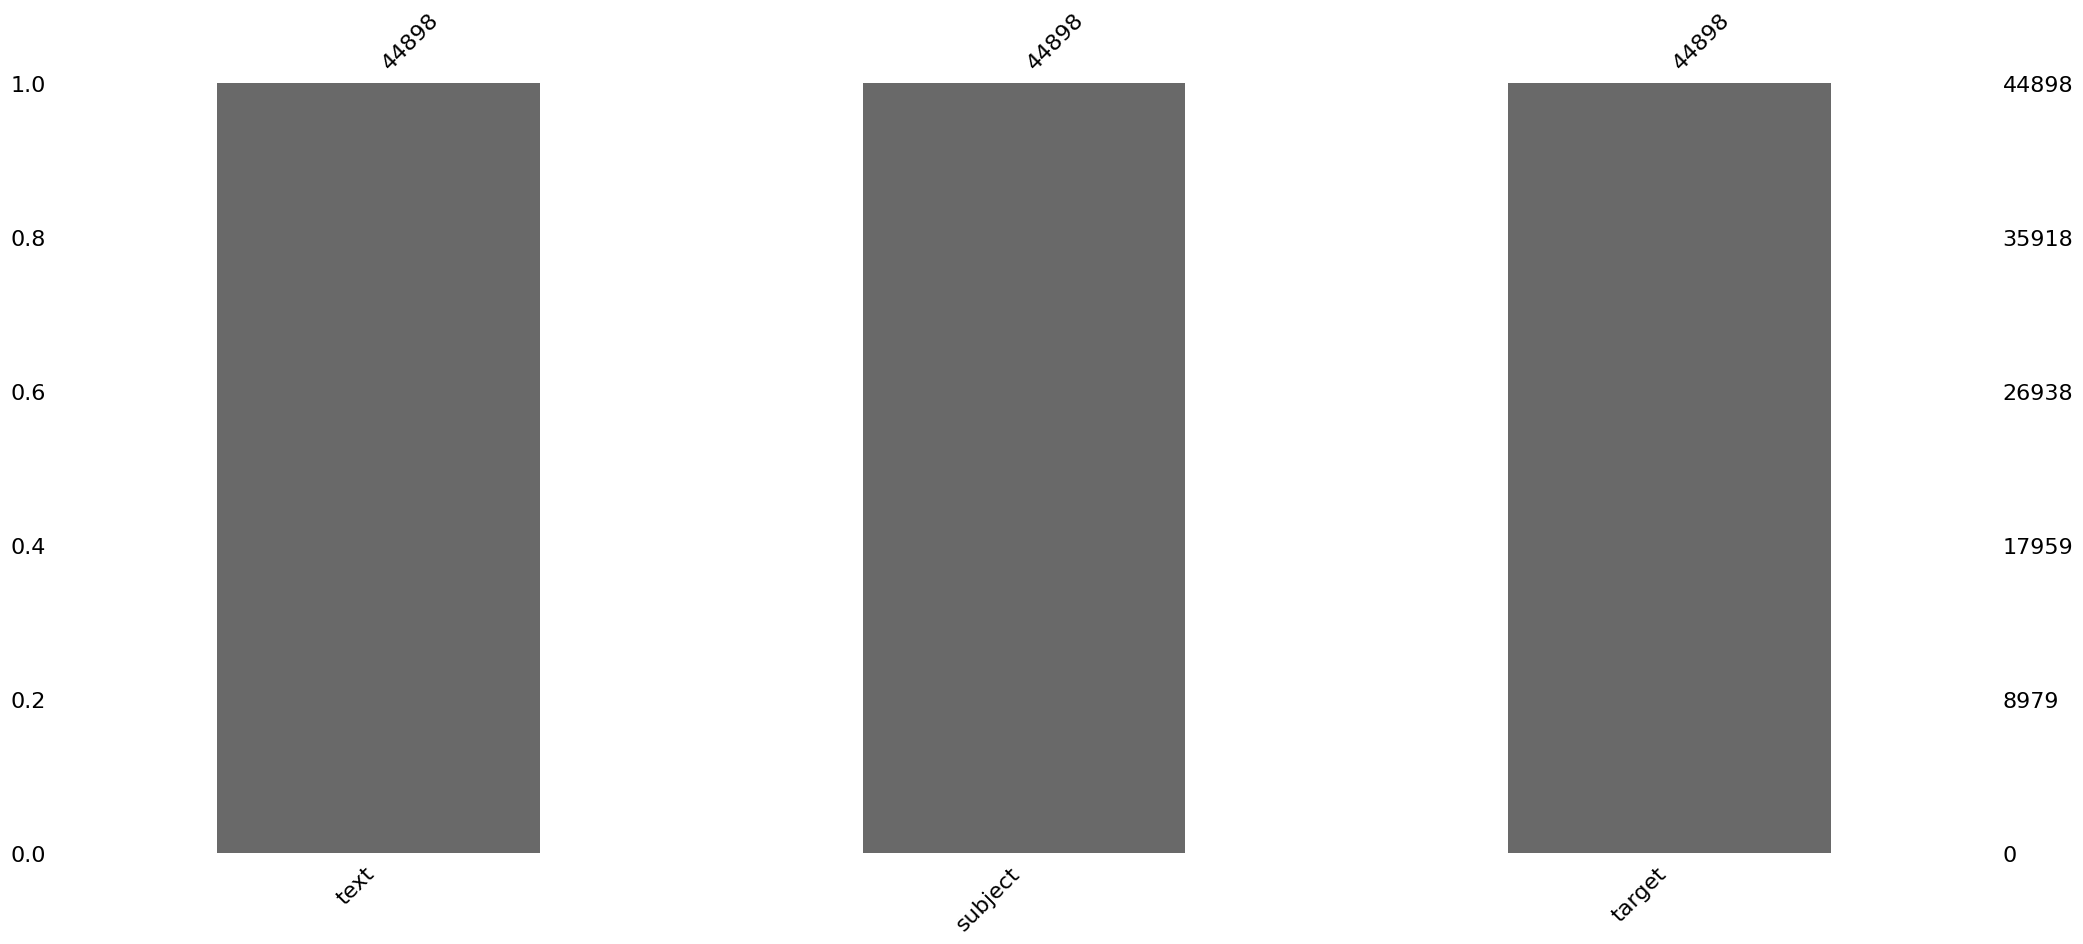

In [ ]:
import missingno as ms
ms.bar(data)

In [ ]:
import pandas as pd
data=data.drop_duplicates()

In [ ]:
print(pd.isna(data))
#print(pd.isna(data['text’])) #check missing value in column

        text  subject  target
0      False    False   False
1      False    False   False
2      False    False   False
3      False    False   False
4      False    False   False
...      ...      ...     ...
44893  False    False   False
44894  False    False   False
44895  False    False   False
44896  False    False   False
44897  False    False   False

[44030 rows x 3 columns]


In [ ]:
# Deleting Missing Values Rows
data.dropna()

,text,subject,target
0,schumer asked president mention decision publi...,left-news,fake
1,philadelphia reuters democrat divided future p...,politicsNews,true
2,texas mother recently woke possibly one infuri...,News,fake
3,washington reuters former fbi chief james come...,politicsNews,true
4,reince priebus appeared fox news sunday got as...,News,fake
...,...,...,...
44893,frankfurt reuters around 60000 inhabitant germ...,worldnews,true
44894,tune alternate current radio network acr anoth...,US_News,fake
44895,london reuters british prime minister theresa ...,worldnews,true
44896,beijing reuters u shortterm rental service air...,worldnews,true


In [ ]:
from sklearn.preprocessing import LabelEncoder
target_column = 'target'

label_encoder = LabelEncoder()

# Fit and transform the target column
data[target_column] = label_encoder.fit_transform(data[target_column])

# Print the mapping of labels to encoded values
print("Label Encoding Mapping:")
for target, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{target}: {encoded_value}")


Label Encoding Mapping:
fake: 0
true: 1


In [ ]:
data.head()

,text,subject,target
0,schumer asked president mention decision publi...,left-news,0
1,philadelphia reuters democrat divided future p...,politicsNews,1
2,texas mother recently woke possibly one infuri...,News,0
3,washington reuters former fbi chief james come...,politicsNews,1
4,reince priebus appeared fox news sunday got as...,News,0


In [ ]:
has_none = data.isna().any().any()

if has_none:
    print("There are None values in the dataset.")
else:
    print("There are no None values in the dataset.")

There are no None values in the dataset.


In [ ]:
data.head()

,text,subject,target
0,schumer asked president mention decision publi...,left-news,0
1,philadelphia reuters democrat divided future p...,politicsNews,1
2,texas mother recently woke possibly one infuri...,News,0
3,washington reuters former fbi chief james come...,politicsNews,1
4,reince priebus appeared fox news sunday got as...,News,0


**DATA VISUALIZATION**

subject
Government News     1498
Middle-east          778
News                9050
US_News              783
left-news           4300
politics            6419
politicsNews       11213
worldnews           9989
Name: text, dtype: int64


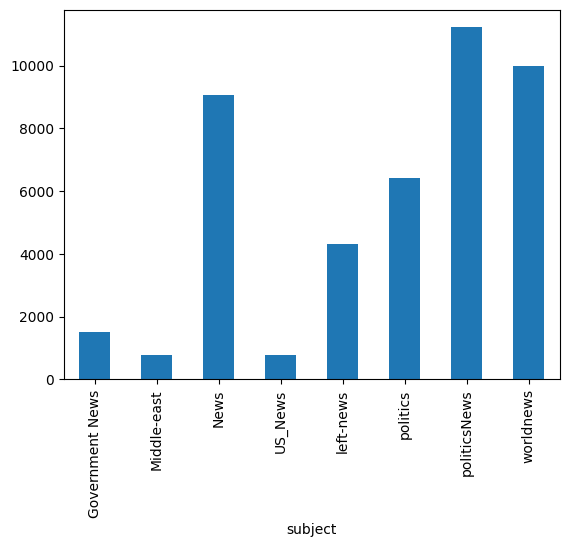

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
0    22828
1    21202
Name: text, dtype: int64


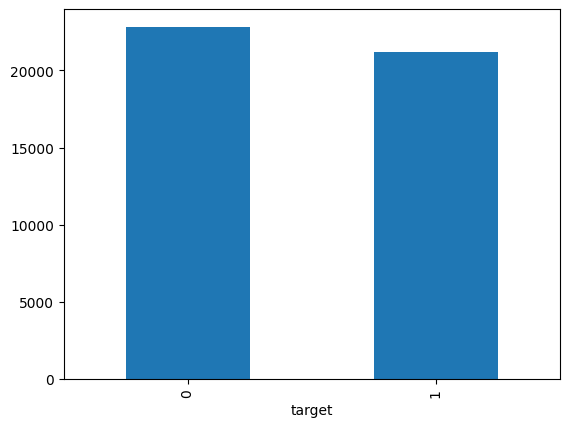

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

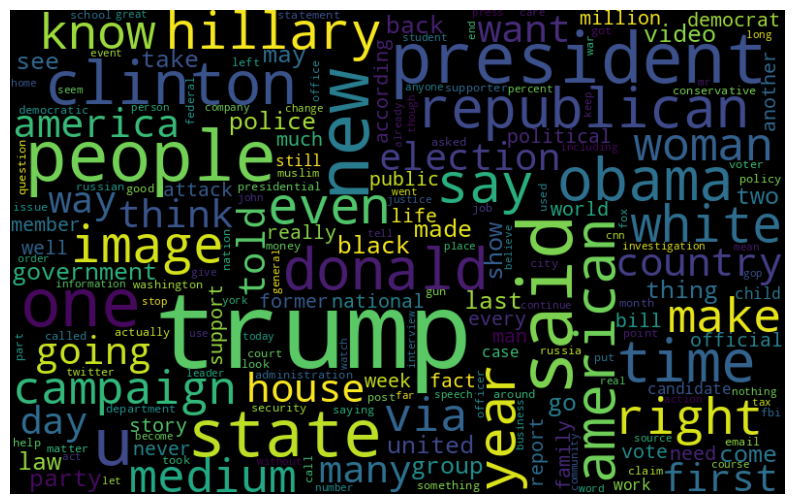

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

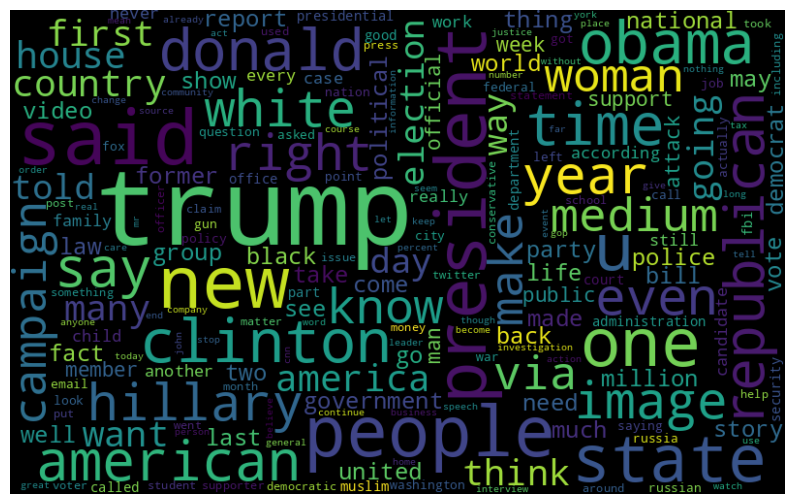

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


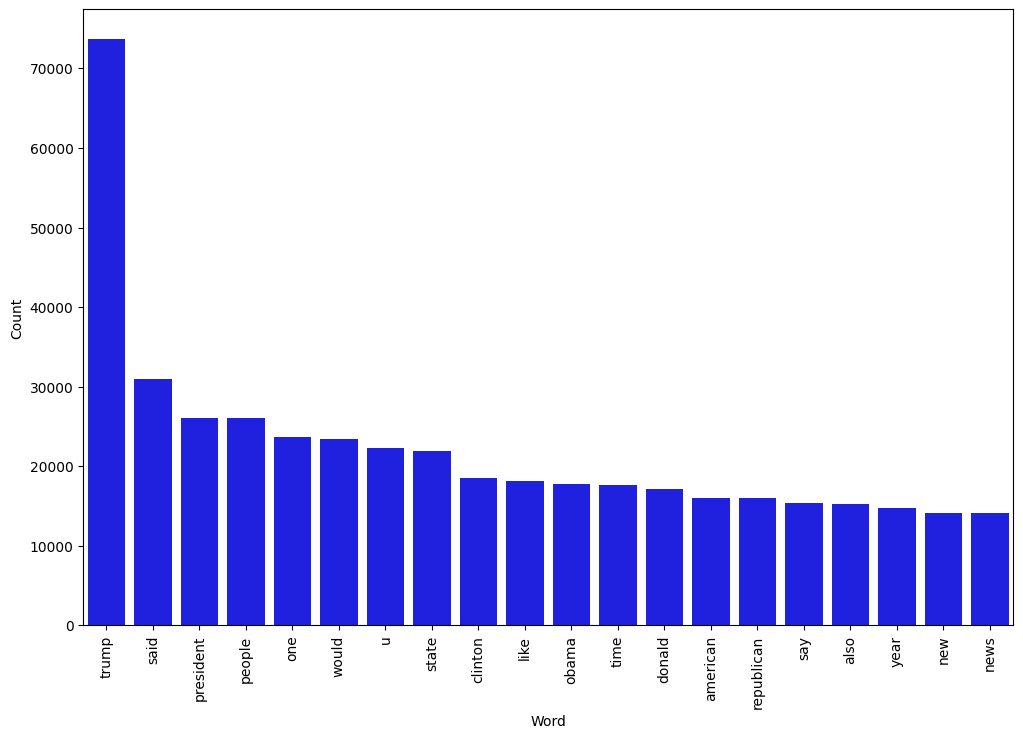

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == 0], "text", 20)

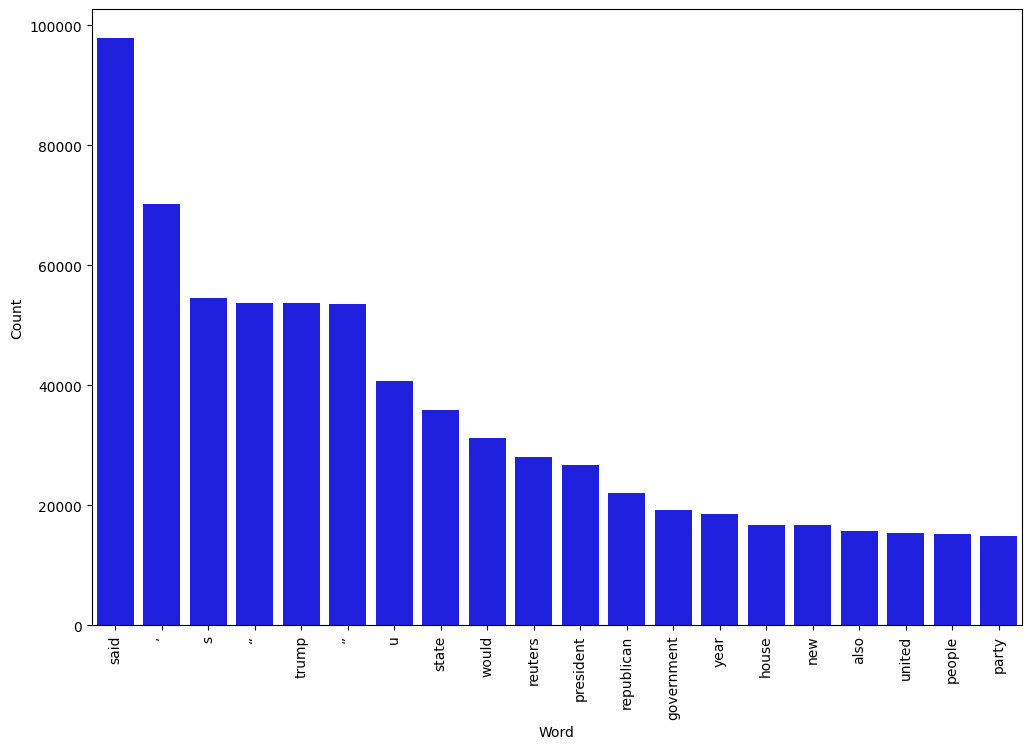

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == 1], "text", 20)

In [ ]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**DATA SPLITTING INTO TRAIN AND TEST**

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

**DATA MODELING**

NAIVE BAYES (MULTINOMIAL)

In [ ]:
dct = dict()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

modeln = pipe.fit(X_train, y_train)
predictionn = modeln.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictionn)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, predictionn)*100,2)

accuracy: 95.36%


Confusion matrix, without normalization


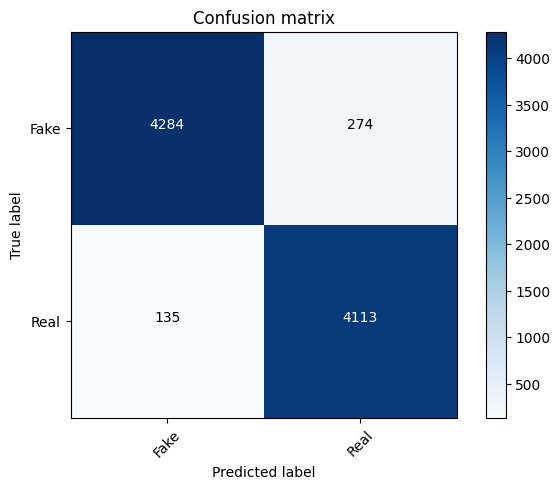

In [ ]:
cm = metrics.confusion_matrix(y_test, predictionn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Precision
precision = precision_score(y_test, predictionn)

#Recall
recall = recall_score(y_test, predictionn)

#f1 score
f1 = f1_score(y_test, predictionn)

# Display Precision and Recall
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.94
Recall: 0.97
F1 Score: 0.95


LOGISTIC REGRESSION

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
modell = pipe.fit(X_train, y_train)

# Accuracy
predictionl = modell.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictionl)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, predictionl)*100,2)

accuracy: 98.96%


Confusion matrix, without normalization


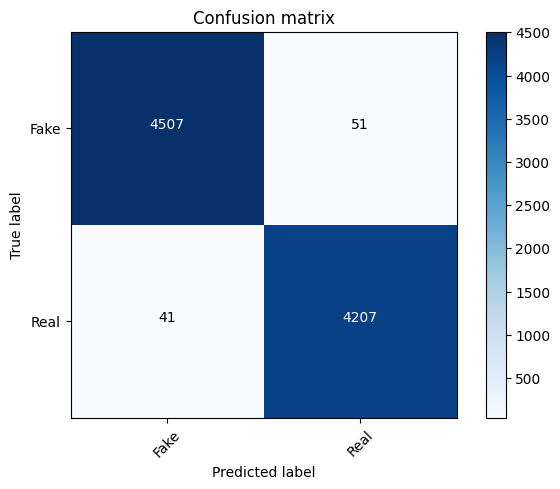

In [ ]:
cm = metrics.confusion_matrix(y_test, predictionl)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Precision
precision = precision_score(y_test, predictionl)

#Recall
recall = recall_score(y_test, predictionl)

#f1 score
f1 = f1_score(y_test, predictionl)

# Display Precision and Recall
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.99
Recall: 0.99
F1 Score: 0.99


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
modeld = pipe.fit(X_train, y_train)

# Accuracy
predictiond = modeld.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictiond)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, predictiond)*100,2)

accuracy: 99.65%


Confusion matrix, without normalization


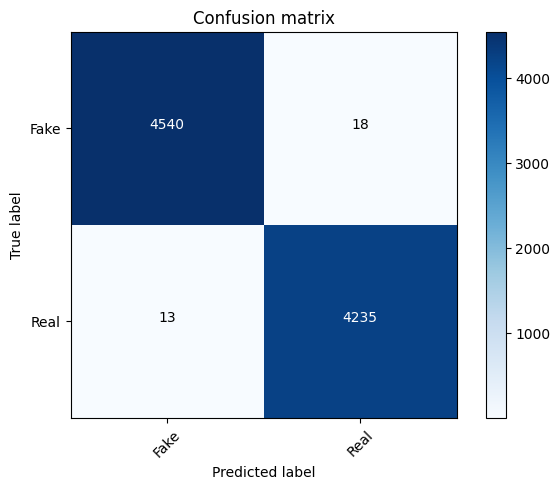

In [ ]:
cm = metrics.confusion_matrix(y_test, predictiond)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Precision
precision = precision_score(y_test, predictiond)

#Recall
recall = recall_score(y_test, predictiond)

#f1 score
f1 = f1_score(y_test, predictiond)

# Display Precision and Recall
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

modelr = pipe.fit(X_train, y_train)
predictionr = modelr.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictionr)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, predictionr)*100,2)

accuracy: 99.19%


Confusion matrix, without normalization


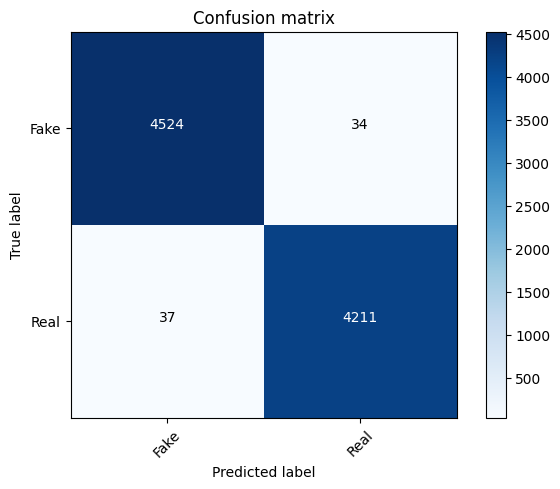

In [ ]:
cm = metrics.confusion_matrix(y_test, predictionr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Precision
precision = precision_score(y_test, predictionr)

#Recall
recall = recall_score(y_test, predictionr)

#f1 score
f1 = f1_score(y_test, predictionr)

# Display Precision and Recall
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.99
Recall: 0.99
F1 Score: 0.99


SVM CLASSIFIER

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0)
pipe= Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', SVC(kernel='linear', C=1.0))])

modelsv = pipe.fit(X_train, y_train)
predictionsv = modelsv.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, predictionsv)*100,2)))

dct['SVM'] = round(accuracy_score(y_test, predictionsv)*100,2)

accuracy: 99.53%


Confusion matrix, without normalization


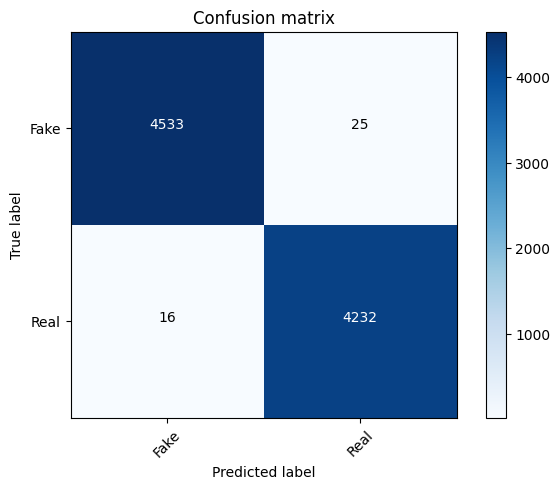

In [ ]:
cm = metrics.confusion_matrix(y_test, predictionsv)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Precision
precision = precision_score(y_test, predictionsv)

#Recall
recall = recall_score(y_test, predictionsv)

#f1 score
f1 = f1_score(y_test, predictionsv)

# Display Precision and Recall
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.99
Recall: 1.00
F1 Score: 1.00


DEEP LEARNING TECHNIQUES

**CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential


In [ ]:
# Tokenization and Padding
max_words = 10000  # Maximum number of words to tokenize
max_sequence_length = 200  # Maximum length of each input sequence
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train2 = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
# Create the CNN model
modelc = Sequential()
modelc.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_sequence_length))
modelc.add(Conv1D(32, 5, activation='relu'))
modelc.add(MaxPooling1D(5))
modelc.add(Flatten())
modelc.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
modelc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
y_train2 = np.array(y_train)  # Convert labels to a NumPy array
modelc.fit(X_train2, y_train2, epochs=5, validation_split=0.2)

Epoch 1/5
881/881 [==============================] - 27s 29ms/step - loss: 0.0980 - accuracy: 0.9579 - val_loss: 0.0175 - val_accuracy: 0.9938
Epoch 2/5
881/881 [==============================] - 23s 26ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.0190 - val_accuracy: 0.9940
Epoch 3/5
881/881 [==============================] - 20s 23ms/step - loss: 8.1875e-04 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9947
Epoch 4/5
881/881 [==============================] - 22s 25ms/step - loss: 3.8590e-04 - accuracy: 0.9999 - val_loss: 0.0168 - val_accuracy: 0.9950
Epoch 5/5
881/881 [==============================] - 20s 23ms/step - loss: 4.1490e-04 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9955


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Tokenize and pad the test data
test_sequences = tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Evaluate the model on the test dataset
loss, accuracy = modelc.evaluate(X_test2, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

y_pred2 = (modelc.predict(X_test2) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

# Print the calculated metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred2))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

276/276 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9943
Test Loss: 0.024350298568606377, Test Accuracy: 0.9943220615386963
276/276 [==============================] - 1s 5ms/step
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4558
           1       1.00      0.99      0.99      4248

    accuracy                           0.99      8806
   macro avg       0.99      0.99      0.99      8806
weighted avg       0.99      0.99      0.99      8806

Confusion Matrix:
[[4542   16]
 [  34 4214]]


Confusion matrix, without normalization


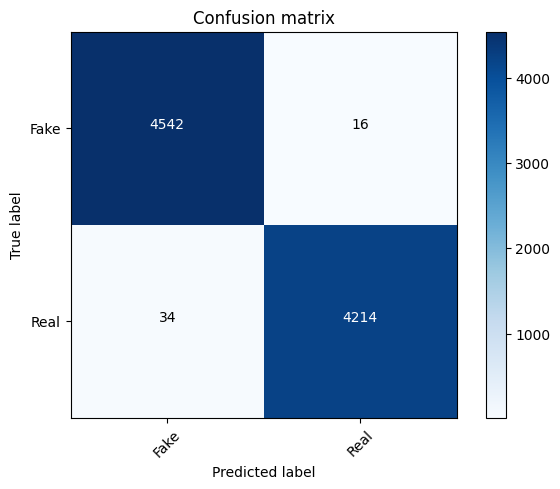

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

max_words = 10000  # Maximum number of words to tokenize
max_sequence_length = 200  # Maximum length of each input sequence

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(sequences_train, maxlen=max_sequence_length)

sequences_test = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length)

# Create and compile the LSTM model
modelm = Sequential()
modelm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
modelm.add(LSTM(64))
modelm.add(Dense(1, activation='sigmoid'))
modelm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
modelm.fit(X_train_padded, y_train, epochs=3, batch_size=64)

# Make predictions and evaluate the model
y_pred3 = (modelm.predict(X_test_padded) > 0.5).astype(int)

Epoch 1/3
551/551 [==============================] - 161s 286ms/step - loss: 0.0979 - accuracy: 0.9645
Epoch 2/3
551/551 [==============================] - 160s 291ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 3/3
276/276 [==============================] - 12s 41ms/step


In [ ]:
data.head()

,text,subject,target
0,september 11 2001 day biggest terrorist attack...,News,0
1,perhaps merkel considered serious consequence ...,politics,0
2,new york reuters trump administration proposin...,politicsNews,1
3,moscow reuters russian president vladimir puti...,politicsNews,1
4,,left-news,0


Accuracy: 0.9944
Precision: 0.9957
Recall: 0.9927
F1 Score: 0.9942
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4558
           1       1.00      0.99      0.99      4248

    accuracy                           0.99      8806
   macro avg       0.99      0.99      0.99      8806
weighted avg       0.99      0.99      0.99      8806

Confusion Matrix:
[[4540   18]
 [  31 4217]]
Confusion matrix, without normalization


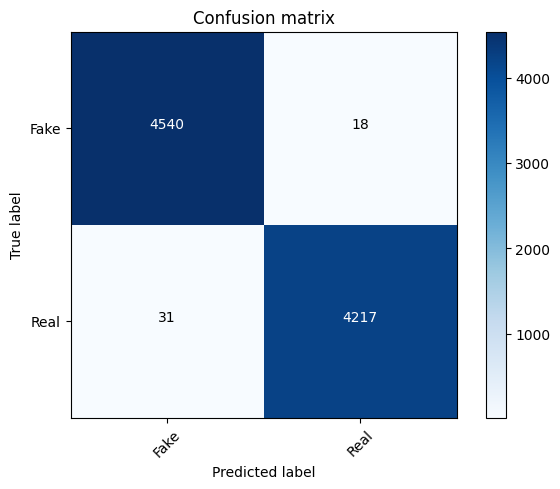

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))
cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

TESTING REAL OR FAKE NEWS

In [ ]:
new_test=input('Enter the news to be checked: ')
test2=[new_test]

Enter the news to be checked: texas mother recently woke possibly one infuriating thing parent see nasty bigoted message facebook warning lesbian daughter cassie watson daughter ali chaney sent home school last month wearing tshirt read people gay get rainbow letter teacher know ali gaythe message question saidthe teacher appears woman named janice williams tried weasel taking responsibility asked offensive message fb account hacked yesterday responsible message sent lady causing believe child would harmed took several attempt delete account notifying fb account hacked lived life protecting right others advocate child saddened hacker cause negativity division among many people please give sincerest apology woman child thank oh bull cooky always fallback excuse write something horrible like someone account hacked however like sane person would confronted something sound like many hollow excuse watson called garbage school district say tshirt disruptive several student complained like te

In [ ]:
prediction=modeld.predict(test2)
if prediction[0]==0:
  print("fake")
else:
  print("true")

fake


**COMPARISON**

In [ ]:
dct['CNN'] = round(accuracy_score(y_test, y_pred2)*100,2)
dct['LSTM'] = round(accuracy_score(y_test, y_pred3)*100,2)

([<matplotlib.axis.YTick at 0x780ca838d180>,
 [Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

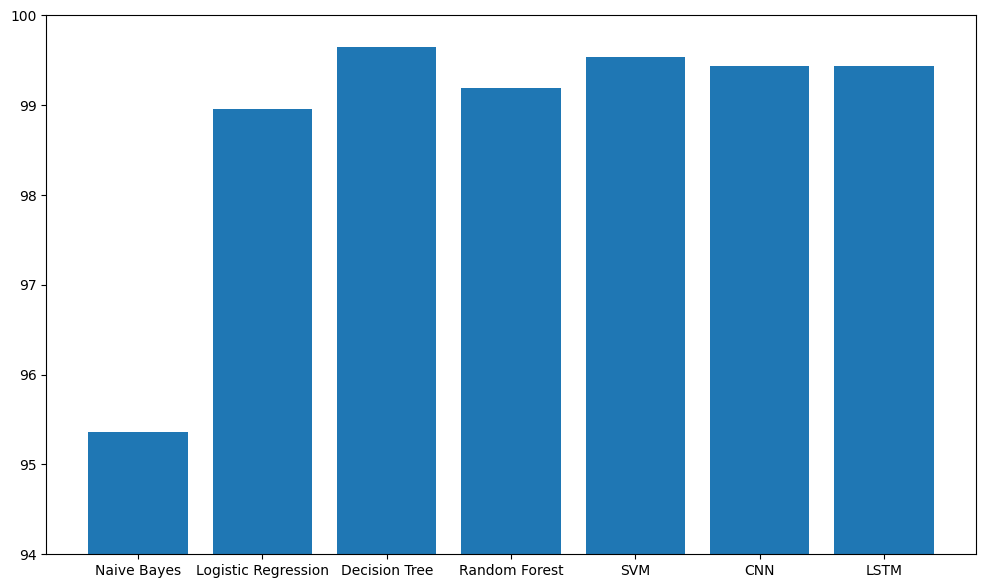

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(94,100)
plt.yticks((94, 95, 96, 97, 98, 99, 100))

In [ ]:
pip install prettytable

In [ ]:
from prettytable import PrettyTable

In [ ]:
models = {
    "Decision Tree": modeld,
    "Support Vector Machine": modelsv,
    "Random Forest": modelr,
    "Logistic Regression": modell,
    "Naive Bayes": modeln,
    "CNN": modelc,
    "LSTM": modelm
}
predictions = {
    "Decision Tree": predictiond,
    "Support Vector Machine": predictionsv,
    "Random Forest": predictionr,
    "Logistic Regression": predictionl,
    "Naive Bayes": predictionn,
    "CNN": y_pred2,
    "LSTM": y_pred3
}
metrics_dict = {}

# Iterate through the models, predict, and calculate metrics
for model_name, model in models.items():
    prediction = predictions[model_name]

    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    metrics_dict[model_name] = {
        "Accuracy": round(accuracy * 100, 2),
        "Precision": round(precision , 4),
        "Recall": round(recall , 4),
        "F1 Score": round(f1 , 4)
    }

In [ ]:
# Print metrics in a tabular form
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

for model_name, metrics in metrics_dict.items():
    table.add_row([model_name, metrics["Accuracy"], metrics["Precision"], metrics["Recall"], metrics["F1 Score"]])

print(table)

+------------------------+----------+-----------+--------+----------+
|         Model          | Accuracy | Precision | Recall | F1 Score |
+------------------------+----------+-----------+--------+----------+
|     Decision Tree      |  99.65   |   0.9958  | 0.9969 |  0.9964  |
| Support Vector Machine |  99.53   |   0.9941  | 0.9962 |  0.9952  |
|     Random Forest      |  99.19   |   0.992   | 0.9913 |  0.9916  |
|  Logistic Regression   |  98.96   |   0.988   | 0.9903 |  0.9892  |
|      Naive Bayes       |  95.36   |   0.9375  | 0.9682 |  0.9526  |
|          CNN           |  99.43   |   0.9962  | 0.992  |  0.9941  |
|          LSTM          |  99.44   |   0.9957  | 0.9927 |  0.9942  |
+------------------------+----------+-----------+--------+----------+


**IMAGE TO TEXT**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install Pillow==9.0.0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 10 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,917 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import pytesseract
from PIL import Image

In [ ]:
img = Image.open('/content/newsimage.png')
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1546x235 at 0x78A4476E8A90>


In [ ]:
result = pytesseract.image_to_string(img)
print(result)

new york reuters trump administration proposing sell coming fiscal year entire gasoline reserve created aftermath hurricane sandy according budget proposal unveiled tuesday u northeast gasoline supply
reserve ngsr established 2014 minimize impact sudden supply interruption occurred 2012 sandy secondcostliest hurricane country ’s history gasoline reserve established part strategic petroleum reserve spr
consists 1 million barrel gasoline blendstock stored commercial storage terminal maine massachusetts new jersey * the ngsr utilized operational functionality envisioned postsandy ” budget proposal said noted
ngsr’s leased commercial storage contract expire early part fiscal 2019 sale would offset 69 million discretionary spending additional proceeds going u treasury ’ s general fund deficit reduction proposal say
sandy battered northeastern u coast end october 2012 destroying home building closing refinery disrupting gasoline supply u east coast account third national gasoline consumption

In [ ]:
new_test=input('Enter the news to be checked: ')
test2=[new_test]
prediction=modeld.predict(test2)
if prediction[0]==0:
  print("fake")
else:
  print("true")

Enter the news to be checked: new york reuters trump administration proposing sell coming fiscal year entire gasoline reserve created aftermath hurricane sandy according budget proposal unveiled tuesday u northeast gasoline supply reserve ngsr established 2014 minimize impact sudden supply interruption occurred 2012 sandy secondcostliest hurricane country ’s history gasoline reserve established part strategic petroleum reserve spr consists 1 million barrel gasoline blendstock stored commercial storage terminal maine massachusetts new jersey * the ngsr utilized operational functionality envisioned postsandy ” budget proposal said noted ngsr’s leased commercial storage contract expire early part fiscal 2019 sale would offset 69 million discretionary spending additional proceeds going u treasury ’ s general fund deficit reduction proposal say sandy battered northeastern u coast end october 2012 destroying home building closing refinery disrupting gasoline supply u east coast account third

**AUDIO TO TEXT**

In [ ]:
pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 27.3 MB/s eta 0:00:00


In [ ]:
pip install pydub

In [ ]:
import speech_recognition as sr
from pydub import AudioSegment

# Initialize the recognizer
recognizer = sr.Recognizer()

# Load the MP3 audio file and convert it to WAV format
audio = AudioSegment.from_mp3("/content/truenews.mp3")
audio.export("converted_audio.wav", format="wav")

# Load the converted WAV audio file
with sr.AudioFile("converted_audio.wav") as source:
    # Adjust for ambient noise, if needed
    recognizer.adjust_for_ambient_noise(source)

    # Listen to the audio file and convert speech to text
    audio = recognizer.listen(source)

# Use Google Web Speech API to recognize the text
try:
    recognized_text = recognizer.recognize_google(audio)
    print("Recognized text: " + recognized_text)
except sr.UnknownValueError:
    print("Google Web Speech API could not understand audio.")
except sr.RequestError as e:
    print(f"Could not request results from Google Web Speech API; {e}")

Recognized text: in Victory for Trump judge tosses suit on foreign payments


**WEB SCRAPING**

In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup

def fetch_headings_from_url(url):
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the webpage
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find and extract the title tags (h1, h2, h3, etc.)
            headings = [heading.text for heading in soup.find_all(['h1'])]  #, 'h2', 'h3', 'h4', 'h5', 'h6'

            return headings
        else:
            print(f"Request to {url} failed with status code {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
### true eg
url = 'https://www.dailymail.co.uk/news/article-7563015/Warriors-coach-Steve-Kerr-slams-Trump-President-called-scared-little-boy.html'  # Replace with the URL of the website you want to fetch headings from
headings = fetch_headings_from_url(url)

if headings:
    print("Main heading found on the webpage:")
    for i, heading in enumerate(headings, start=1):
        print(f"{i}. {heading}")
else:
    print("No headings found on the webpage or an error occurred.")

Main heading found on the webpage:
1. Warriors coach Steve Kerr slams Trump, saying the Oval Office has 'sunken low' after the President questioned his patriotism and called him a 'scared little boy' for refusing to address the NBA's PR crisis in China


In [ ]:
new_test=input('Enter the news to be checked: ')
test2=[new_test]
prediction=modeld.predict(test2)
if prediction[0]==0:
  print("fake")
else:
  print("true")

Enter the news to be checked: Warriors coach Steve Kerr slams Trump, saying the Oval Office has 'sunken low' after the President questioned his patriotism and called him a 'scared little boy' for refusing to address the NBA's PR crisis in China
true


**Unravelling the Web of Deception**


**Fake News Detection System**


**Chelsi**